# Exploratory Visual Analysis

### Content:
- Correlation Matrix Heatmap
- Scatterplot
- Pairplot
- Categorical Plot
- Derive Car Price Variable 

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#show all plots after creating them, set figure size
%matplotlib inline
sns.set(rc={'figure.figsize':(12,8)})

In [3]:
#import data
path = '/Users/kimballwightman/Desktop/Projects/Car Listings Analysis/' 

In [4]:
df_cars = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_cleaned.csv'), index_col = [0])

In [5]:
#determine which variables are irrelevant for analysis
df_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


"Vin" isn't relevant to our analysis here.

In [6]:
#create a subset excluding the 'Vin' variable
sub = df_cars[['Price','Year','Mileage','City','State','Make','Model']]

In [7]:
sub

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,TX,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,Acura,ILXAutomatic
...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,Volvo,V90


### Correlation Matrix Heatmap

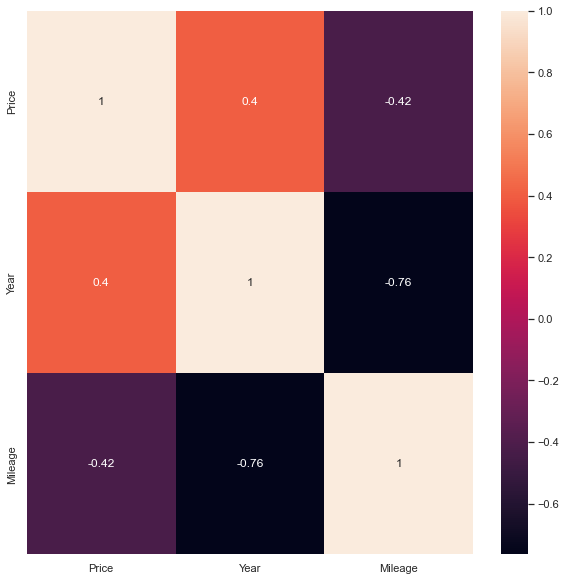

In [8]:
#create a subplot with matplotlib
f,ax = plt.subplots(figsize = (10,10))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

The matrix shows three correlations:

1) Year and Mileage, -0.76 (strong negative relationship): the older the car, the higher the mileage.

2) Price and Mileage, -0.42 (moderate negative relationship): the higher the mileage, the lower the price.

3) Year and Price, 0.4 (moderate postive relationship): the newer the car, the higher the price.

What's interesting is that Year and Mileage have the same strength of a relationship with Price. They both generally inform how much the car has depreciated over time, and relate to how much the car is worth, or the price. We'll use the relationship between Mileage and Price for our analysis.

### Scatterplot

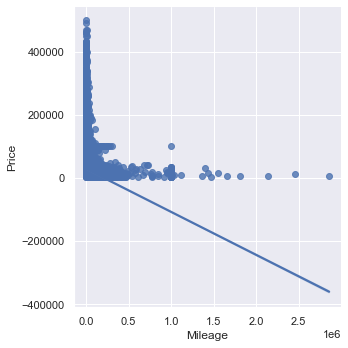

In [9]:
#create a scatterplot between Year and Mileage
sns.lmplot(x = 'Mileage', y = 'Price', data = sub)

The regression line here isn't very useful here as a predictor. The relationship between price and mileage (when including cars that are outliers for either variable) is not linear. It might be if we adjusted for outliers. 

### Pairplot

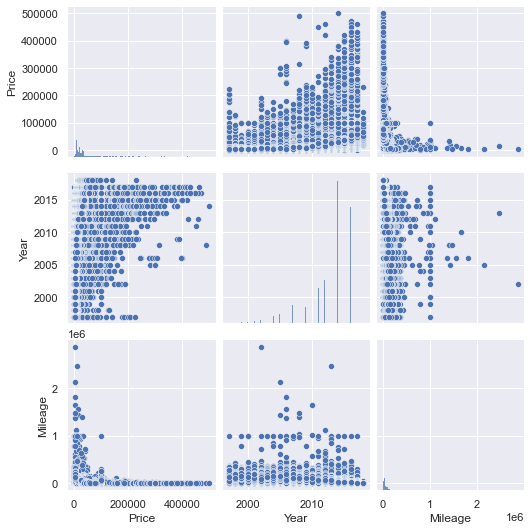

In [10]:
#create a pairplot
g = sns.pairplot(sub)

Innaccurate prices are tricky to identify since they depend on the model, so that will be broken down.

As for the mileage, many values are exactly 1 million miles, which could be a placeholder for something like a missing value. Cars typically don't last far beyond 300,000 miles, so what are our outliers here? These cars likely have had their engine replaced, allowing them to reach up to and well beyond a million miles. To deal with these, I'll create a flag variable for any car above 500,000 miles, allowing the analysis to continue without these observations if necessary.

### Categorical Plot

<AxesSubplot:xlabel='Price', ylabel='Count'>

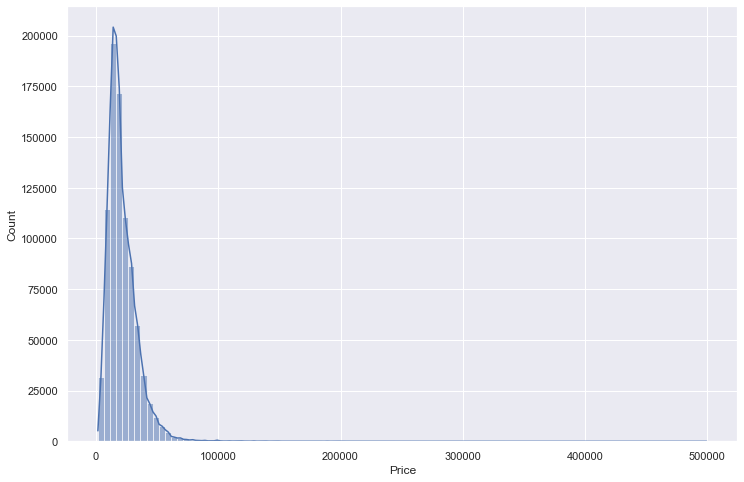

In [11]:
#generate a flag variable if car has high price or high mileage
#first, create histograms to identify cutoffs for outliers
sns.histplot(sub['Price'], bins = 100, kde = True)

<AxesSubplot:xlabel='Mileage', ylabel='Count'>

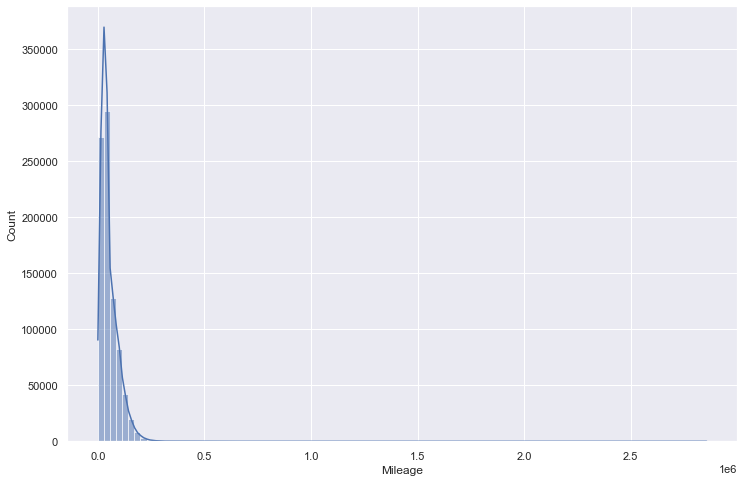

In [12]:
sns.histplot(sub['Mileage'], bins = 100, kde = True)

In [13]:
#price flag
sub.loc[sub['Price'] >= 100000, 'Price_Flag'] = 'High Price'

In [14]:
sub.loc[sub['Price'] < 100000, 'Price_Flag'] = 'Low Price'

In [15]:
sub['Price_Flag'].value_counts(dropna = False)

Low Price     850327
High Price      1765
Name: Price_Flag, dtype: int64

In [16]:
#mileage flag
sub.loc[sub['Mileage'] >= 500000, 'Mileage_Flag'] = 'High Mileage'

In [17]:
sub.loc[sub['Mileage'] < 500000, 'Mileage_Flag'] = 'Low Mileage'

In [18]:
sub['Mileage_Flag'].value_counts(dropna = False)

Low Mileage     852034
High Mileage        58
Name: Mileage_Flag, dtype: int64

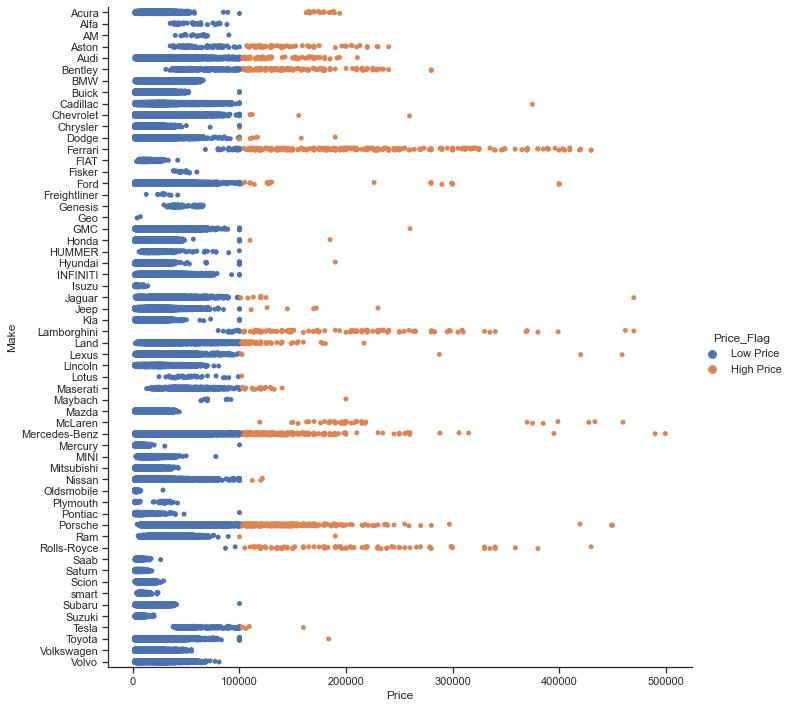

In [19]:
#create a categorical plot for price and make
sns.set(style = 'ticks')
g = sns.catplot(x = 'Price', y = 'Make', hue = 'Price_Flag', data = sub, height = 10)

Notable high-priced makes: Aston, Audi, Bentley, Ferrari, Lamborghini, Land Rover, McLaren, Mercedez-Benz, Porsche, Rolls-Royce

We have some makes that have only a few really randomly high-priced cars. We'll need to investigate and clean these. These makes are: 

Bentley, Buick, Cadillac, Chevrolet, Chrysler, Dodge, Ford, GMC, Honda, Hyundai, Jaguar, Jeep, Land Rover, Lexus, Maybach, McLaren, Mercedez-Benz, Mercury, Nissan, Pontiac, Porsche, Ram, Subaru, Tesla, Toyota

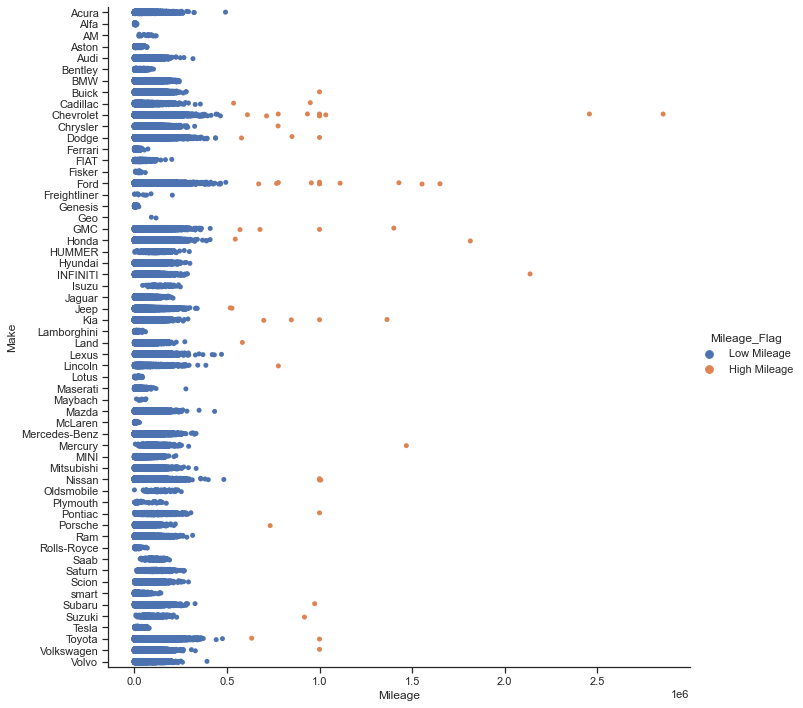

In [20]:
#create another catplot for mileage and make
g = sns.catplot(x = 'Mileage', y = 'Make', hue = 'Mileage_Flag', data = sub, height = 10)

Notable high mileage makes are Chevrolet, Dodge, Ford, GMC, Honda, and Toyota. These also are the car makes of the highest count of listings on the website, and where engine swaps would be easiest and cheapest.

In [21]:
#import the new cleaned data set
#I went back to the script for 6.1, cleaned the price variable
df_clean = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','cars_prices_clean.csv'), index_col = [0])

After going back and cleaning the dataset in the 6.1 cleaning script, here's what the catplot for price by make looks like:

In [22]:
#price flag
df_clean.loc[df_clean['Price'] >= 100000, 'Price_Flag'] = 'High Price'
df_clean.loc[df_clean['Price'] < 100000, 'Price_Flag'] = 'Low Price'

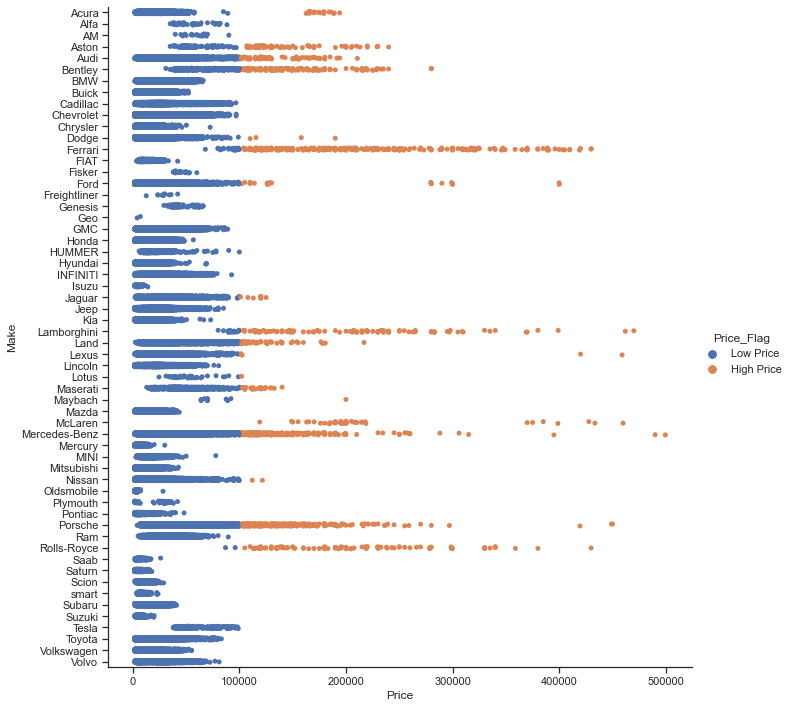

In [23]:
g = sns.catplot(x = 'Price', y = 'Make', hue = 'Price_Flag', data = df_clean, height = 10)

As shown here, we still have some outliers that show up. This is for specific models that are more rare and are more expensive as a result. Other makes are mostly higher-priced because they're considered as luxury makes.

Noticably different are the absence of many random orange points, as well as the "line" points at 100,000. This graphically shows how the cleaning worked.

In [25]:
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_make.png'))